#### Scraping

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /Users/johnhwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnhwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnhwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('reddit_scraped_data.csv')

In [ ]:
df['comment_body']=df['comment_body'].astype(str)

KeyError: 'comment_body'

In [ ]:
data=df.copy(deep=True)

In [ ]:
data['post_body']=data['post_body'].fillna(' ')

In [ ]:
data

In [ ]:
#Removing special character
data['comment_body'] = data.apply(lambda x: re.sub("([!\"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#']+)",'',x['comment_body']),axis=1)
#Removing extra lines
data['comment_body'] = data.apply(lambda x: x['comment_body'].replace('\n',' '),axis=1)
#Removing additional spaces and converting to lower case
data['comment_body'] = data.apply(lambda x: re.sub("\\s+",' ',x['comment_body'].strip().lower()),axis=1)

data

In [ ]:
data['tokenized_words'] = data.apply(lambda x: word_tokenize(x['comment_body']),axis=1)
data

In [ ]:
#removing stopwords
data['tokenized_words_without_stopwords'] = data['tokenized_words'].apply(lambda x: [item for item in x if item not in stopwords])
lemmatizer = WordNetLemmatizer()
#Get root form of the word
data['tokenized_words_without_stopwords'] = data['tokenized_words_without_stopwords'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
data.head()

In [ ]:
all_words = data['tokenized_words_without_stopwords'].sum()
words_frequency= nltk.FreqDist(all_words)
words_frequency
words_frequency_df = pd.DataFrame(data=words_frequency.items(),columns=['Word','Frequency'])
word_counts=words_frequency_df.sort_values(by='Frequency',ascending=False)
word_counts

In [ ]:
word_counts.to_csv('words_freq.csv')

NameError: name 'word_counts' is not defined

In [ ]:
data.to_csv('file_to_use.csv')

# Exploratory Analysis of the Scraped Data



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving words_freq_comparison.csv to words_freq_comparison.csv
Saving file_to_use_comparison.csv to file_to_use_comparison.csv


In [ ]:
import pandas as pd

# Load the dataset (adjust the file path if necessary)
df = pd.read_csv('file_to_use_comparison.csv')

# Get the distinct values in the 'subreddit' column
unique_subreddits = df['subreddit'].unique()

# Display the distinct values
print("Distinct values in the 'subreddit' column:")
for subreddit in unique_subreddits:
    print(subreddit)


Distinct values in the 'subreddit' column:
india
IndianModerate
AstronautHopefuls
space
IndianDankMemes
IndiaSpeaks
scienceisdope
SpaceXLounge
nasa
Btechtards
askasia
indiadiscussion
ISRO
agedlikemilk
bakchodi
worldnews
spaceporn
NoStupidQuestions
Damnthatsinteresting
hinduism
aviation


In [ ]:
# Load the dataset
df = pd.read_csv('file_to_use_comparison.csv')

# Display the first 10 rows of the dataset to view the context
print("First 10 rows of the CSV file:")
print(df.head(10))


First 10 rows of the CSV file:
   Unnamed: 0 subreddit                                post_title  \
0           0     india  Why is ISRO so terrible at presentation?   
1           1     india  Why is ISRO so terrible at presentation?   
2           2     india  Why is ISRO so terrible at presentation?   
3           3     india  Why is ISRO so terrible at presentation?   
4           4     india  Why is ISRO so terrible at presentation?   
5           5     india  Why is ISRO so terrible at presentation?   
6           6     india  Why is ISRO so terrible at presentation?   
7           7     india  Why is ISRO so terrible at presentation?   
8           8     india  Why is ISRO so terrible at presentation?   
9           9     india  Why is ISRO so terrible at presentation?   

                                            post_url  \
0  https://www.reddit.com/r/india/comments/160s1j...   
1  https://www.reddit.com/r/india/comments/160s1j...   
2  https://www.reddit.com/r/india/comment

# Lift Analysis

In [ ]:
#Display top words
from collections import Counter

# Load the CSV file
df = pd.read_csv('file_to_use_comparison.csv')

# Initialize a Counter to count word frequencies
word_counter = Counter()

# Iterate over the tokenized words without stopwords
for tokens in df['tokenized_words_without_stopwords']:
    token_list = eval(tokens)  # Convert stringified list back to a list
    word_counter.update(token_list)  # Update the counter with the words

# Get the 30 most common words
top_200_words = word_counter.most_common(200)

# Display the result
for word, count in top_200_words:
    print(f'{word}: {count}')

.: 6234
,: 4205
(: 1265
): 1046
space: 990
[: 979
]: 960
's: 940
iso: 844
?: 789
n't: 708
--: 695
*: 670
india: 617
'': 576
``: 573
|: 520
!: 504
nasal: 485
like: 481
moon: 413
mission: 409
people: 387
indian: 386
get: 366
would: 359
u: 352
last: 340
:: 330
one: 323
year: 284
even: 279
country: 276
usage: 275
launch: 259
time: 256
work: 256
thing: 253
also: 244
need: 240
^: 222
much: 219
make: 217
first: 215
think: 209
satellite: 200
rocket: 197
see: 196
science: 195
good: 195
know: 189
>: 186
go: 181
budget: 180
going: 177
-: 176
program: 176
could: 170
well: 165
money: 163
...: 163
really: 162
many: 161
way: 160
still: 150
-|: 150
take: 147
landing: 146
research: 144
government: 144
want: 142
scientist: 138
world: 132
something: 132
new: 131
lot: 129
launched: 127
got: 127
say: 127
%: 127
removed: 127
project: 126
job: 125
engine: 125
technology: 124
private: 123
better: 123
exploration: 123
..: 122
system: 121
landed: 119
're: 118
cost: 118
rover: 117
working: 117
thread: 116
come: 

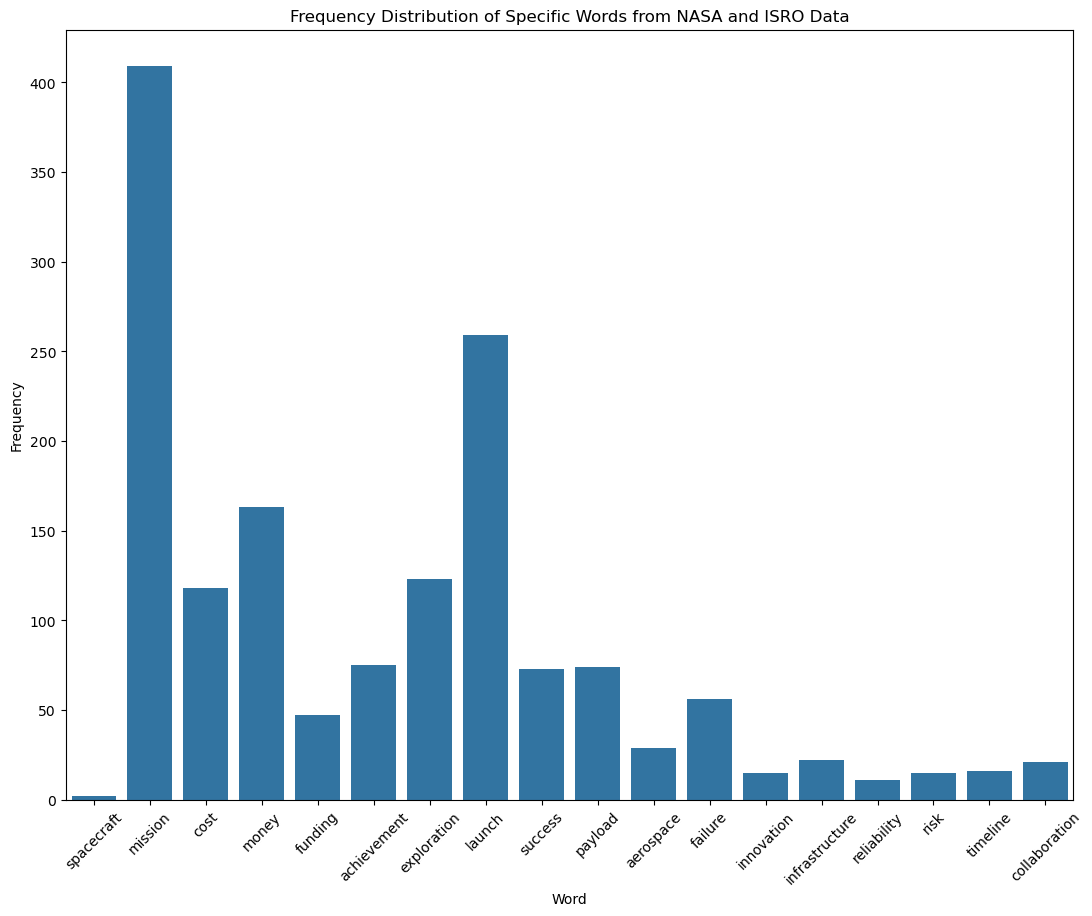

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame is already loaded as df
# List of specific words you want to check the frequency for
attributes = [
    'innovation', 'infrastructure', 'collaboration', 'risk', 'resources', 
    'mission', 'success', 'spacecraft', 'timeline', 'exploration', 'sustainability', 
    'reliability', 'launch', 'payload', 'failure', 'funding', 'aerospace', 'money', 
    'cost', 'achievement'
]

# Initialize a Counter for word frequencies
word_counter = Counter()

# Iterate through the 'tokenized_words_without_stopwords' column in the dataframe
for tokens in df['tokenized_words_without_stopwords']:
    token_list = eval(tokens)  # Convert stringified list back to a list
    filtered_tokens = [word for word in token_list if word in attributes]  # Filter by the list of attributes
    word_counter.update(filtered_tokens)  # Update the counter with the words

# Create a DataFrame from the word frequencies for plotting
word_freq_df = pd.DataFrame(word_counter.items(), columns=['Word', 'Frequency'])

# Plotting the frequency distribution
plt.figure(figsize=(13, 10))
sns.barplot(x='Word', y='Frequency', data=word_freq_df)
plt.title('Frequency Distribution of Specific Words from NASA and ISRO Data')
plt.xticks(rotation=45)
plt.show()


### Analysis

We chose the following top attributes according to what we saw as relevant to the problem statement. A few things we considered in choosing these words was if it was likely or not to appear together in a single comment. For example, filler words like "one" and "also" would likely lead to a lift analysis that does not provide any insights whereas choosing words that sparingly appear may lead to not enough data sample.

In [31]:
from collections import Counter, defaultdict
import itertools

# Load the CSV file
df = pd.read_csv('file_to_use_comparison.csv')

top_10_words = attributes

# Initialize a Counter for individual word occurrences
word_occurrences = Counter()

# Initialize a defaultdict for counting co-occurrences of word pairs
co_occurrences = defaultdict(int)

# Count total posts or comments
total_posts = len(df)

# Iterate through the tokenized words and count occurrences and co-occurrences for top 10 words
for tokens in df['tokenized_words_without_stopwords']:
    token_list = eval(tokens)  # Convert stringified list back to a list
    filtered_tokens = [word for word in token_list if word in top_10_words]  # Filter only the top 10 words
    unique_words = set(filtered_tokens)  # Ensure each word is counted only once per post

    # Count individual occurrences
    for word in unique_words:
        word_occurrences[word] += 1

    # Count co-occurrences (no word distance logic)
    for word1, word2 in itertools.combinations(unique_words, 2):
        co_occurrences[frozenset([word1, word2])] += 1

# Prepare a list for storing lift data
lift_data = []

# Calculate lift ratios for word pairs
for word1, word2 in itertools.combinations(top_10_words, 2):
    pair = frozenset([word1, word2])
    p_a = word_occurrences[word1] / total_posts
    p_b = word_occurrences[word2] / total_posts
    p_ab = co_occurrences[pair] / total_posts

    # Calculate lift and check to prevent division by zero
    if p_a > 0 and p_b > 0:
        lift = p_ab / (p_a * p_b)
        lift_data.append((word1, word2, lift))
    else:
        lift_data.append((word1, word2, 0.0))

# Create a DataFrame from the lift data
lift_df = pd.DataFrame(lift_data, columns=['Word 1', 'Word 2', 'Lift Ratio'])

# Sort by lift ratio to show the strongest co-occurrences at the top
lift_df_sorted = lift_df.sort_values(by='Lift Ratio', ascending=False)

# Display the top 20 lift ratios
print(lift_df_sorted.head(20))


             Word 1         Word 2  Lift Ratio
155     reliability        payload   28.084034
141     exploration      aerospace   19.140893
113      spacecraft    exploration   17.226804
58             risk       timeline   15.914286
86          mission     spacecraft   13.314741
106         success        failure   12.736280
121      spacecraft          money   12.377778
156     reliability        failure   11.644599
13       innovation        failure   10.868293
160     reliability           cost   10.728732
14       innovation        funding   10.609524
19   infrastructure  collaboration   10.443750
18       innovation    achievement   10.443750
171         payload      aerospace    9.708061
154     reliability         launch    8.680519
15       innovation      aerospace    8.251852
169         payload        failure    7.991392
162          launch        payload    7.942959
90          mission    reliability    7.608423
35   infrastructure           cost    7.510112


In [33]:
top_words = attributes

# Iterate through the tokenized words and count occurrences and co-occurrences for top words
for tokens in df['tokenized_words_without_stopwords']:
    token_list = eval(tokens)  # Convert stringified list back to a list
    filtered_tokens = [word for word in token_list if word in top_words]  # Filter only the words of interest
    unique_words = set(filtered_tokens)  # Ensure each word is counted only once per post

    # Count individual occurrences
    for word in unique_words:
        word_occurrences[word] += 1

    # Count co-occurrences for three-word triplets
    for word1, word2, word3 in itertools.combinations(unique_words, 3):
        co_occurrences[frozenset([word1, word2, word3])] += 1

# Prepare a list for storing lift data
lift_data = []

# Calculate lift ratios for word triplets
for word1, word2, word3 in itertools.combinations(top_words, 3):
    triplet = frozenset([word1, word2, word3])
    p_a = word_occurrences[word1] / total_posts
    p_b = word_occurrences[word2] / total_posts
    p_c = word_occurrences[word3] / total_posts
    p_abc = co_occurrences[triplet] / total_posts

    # Calculate lift and check to prevent division by zero
    if p_a > 0 and p_b > 0 and p_c > 0:
        lift = p_abc / (p_a * p_b * p_c)
        lift_data.append((word1, word2, word3, lift))
    else:
        lift_data.append((word1, word2, word3, 0.0))

# Create a DataFrame from the lift data
lift_df = pd.DataFrame(lift_data, columns=['Word 1', 'Word 2', 'Word 3', 'Lift Ratio'])

# Sort by lift ratio to show the strongest co-occurrences at the top
lift_df_sorted = lift_df.sort_values(by='Lift Ratio', ascending=False)

# Display the top 30 lift ratios for triplets
print(lift_df_sorted.head(30))

              Word 1         Word 2       Word 3  Lift Ratio
520             risk       timeline      funding  158.290306
1063     reliability        payload      failure   95.382968
157       innovation        failure    aerospace   84.078320
820          success    reliability      failure   76.008302
152       innovation        payload    aerospace   67.592375
819          success    reliability      payload   61.104714
872       spacecraft    exploration        money   53.307388
186   infrastructure  collaboration         cost   49.021085
1056     reliability         launch      payload   47.402445
120       innovation    exploration      failure   46.806487
150       innovation        payload      failure   44.512052
1067     reliability        payload         cost   43.940468
985      exploration    reliability      payload   40.316512
122       innovation    exploration    aerospace   35.538259
164       innovation        funding  achievement   34.626004
185   infrastructure  co

### Analysis

When running a lift calculation with 2 vs. 3 words, it appears that the top lift scores for 3 words is generally higher than its counterpart. This observation tells us that for each individual attribute we specified, it rarely appears alone in a sentence. However, when they do appear, they are more likely to appear together. For instance, the words satellite, budget, and cost is likely to appear together in a post or comment than individually, showcasing relevant insight into comparing NASA vs ISRO.

In [37]:
# Create a DataFrame from the lift data
lift_df = pd.DataFrame(lift_data, columns=['att 1', 'att 2','att3', 'Lift Ratio'])

# Display the DataFrame
lift_df.sort_values(by=['Lift Ratio','att 1'],ascending=False)[:5]

,att 1,att 2,att3,Lift Ratio
520,risk,timeline,funding,158.290306
1063,reliability,payload,failure,95.382968
157,innovation,failure,aerospace,84.078320
820,success,reliability,failure,76.008302
152,innovation,payload,aerospace,67.592375


In [39]:
top_3_atts = lift_df.sort_values(by=['Lift Ratio','att 1'],ascending=False)[:1]

print("Top 3 attributes are:")
print('1: ',top_3_atts.iloc[0, 0])
print('2: ',top_3_atts.iloc[0, 1])
print('3: ',top_3_atts.iloc[0, 2])

Top 3 attributes are:
1:  risk
2:  timeline
3:  funding


In [67]:
import pandas as pd
from collections import Counter, defaultdict
import itertools

# Load the dataset (adjust the file path if necessary)
df = pd.read_csv('file_to_use_comparison.csv')

# Filter the DataFrame for only 'nasa' and 'ISRO' subreddits
nasa_subreddit = df[df['subreddit'] == 'nasa']
isro_subreddit = df[df['subreddit'] == 'ISRO']

# Pre-selected words to perform the lift analysis
top_words = attributes

# Function to calculate lift ratios for word pairs
def lift_analysis(dataframe):
    word_occurrences = Counter()
    co_occurrences = defaultdict(int)
    total_posts = len(dataframe)
    
    for tokens in dataframe['tokenized_words_without_stopwords']:
        token_list = eval(tokens)
        filtered_tokens = [word for word in token_list if word in top_words]  # Filter only the words of interest
        unique_words = set(filtered_tokens)  # Ensure each word is counted only once per post

        # Count individual occurrences
        for word in unique_words:
            word_occurrences[word] += 1

        # Count co-occurrences for two-word pairs
        for word1, word2 in itertools.combinations(unique_words, 2):
            co_occurrences[frozenset([word1, word2])] += 1

    # Calculate lift ratios for word pairs
    lift_data = []
    for word1, word2 in itertools.combinations(top_words, 2):
        pair = frozenset([word1, word2])
        p_a = word_occurrences[word1] / total_posts
        p_b = word_occurrences[word2] / total_posts
        p_ab = co_occurrences[pair] / total_posts
        
        if p_a > 0 and p_b > 0:
            lift = p_ab / (p_a * p_b)
            lift_data.append((word1, word2, lift))
        else:
            lift_data.append((word1, word2, 0.0))
    
    # Create DataFrame from the lift data
    lift_df = pd.DataFrame(lift_data, columns=['Word 1', 'Word 2', 'Lift Ratio'])
    return lift_df.sort_values(by='Lift Ratio', ascending=False)

# Run lift analysis for NASA and ISRO subreddits
lift_nasa = lift_analysis(nasa_subreddit)
lift_isro = lift_analysis(isro_subreddit)

# Display the top 30 lift ratios for both NASA and ISRO
print("Top Lift Ratios for NASA Subreddit:")
print(lift_nasa.head(30))

print("\nTop Lift Ratios for ISRO Subreddit:")
print(lift_isro.head(30))


Top Lift Ratios for NASA Subreddit:
          Word 1          Word 2  Lift Ratio
56          risk         success  100.000000
141  exploration       aerospace   66.666667
165       launch       aerospace   40.000000
95       mission       aerospace   18.181818
88       mission     exploration   18.181818
137  exploration          launch   13.333333
96       mission           money    8.080808
91       mission          launch    7.272727
183      funding     achievement    0.000000
128     timeline         payload    0.000000
119   spacecraft         funding    0.000000
120   spacecraft       aerospace    0.000000
121   spacecraft           money    0.000000
122   spacecraft            cost    0.000000
123   spacecraft     achievement    0.000000
124     timeline     exploration    0.000000
125     timeline  sustainability    0.000000
126     timeline     reliability    0.000000
127     timeline          launch    0.000000
129     timeline         failure    0.000000
117   spacecraft   

# Cosine Similarity using Bag of Words




In [44]:
# Load your dataset (adjust this if the filename or path is different)
df = pd.read_csv('file_to_use_comparison.csv')

# Drop rows where 'comment_body' has NaN values
df_cleaned = df.dropna(subset=['comment_body'])

# Check the number of rows before and after dropping NaN values
print(f"Total rows before dropping NaN: {len(df)}")
print(f"Total rows after dropping NaN in 'comment_body': {len(df_cleaned)}")

# Optionally, save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('file_without_nan_comment_body.csv', index=False)


Total rows before dropping NaN: 3342
Total rows after dropping NaN in 'comment_body': 3258


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

product_attributes = [top_3_atts.iloc[0, 0],top_3_atts.iloc[0, 1],top_3_atts.iloc[0, 2]]

# Vectorize the comments
count_vectorizer = CountVectorizer(stop_words='english', lowercase=True)
count_matrix = count_vectorizer.fit_transform(df_cleaned['comment_body'])

# Convert the list of words (attributes) into a numerical vector
word_vector = count_vectorizer.transform([' '.join(product_attributes)])

# Compute cosine similarity between each review and the attributes
similarities = cosine_similarity(count_matrix, word_vector)

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'post_title': df_cleaned['post_title'],
    'comment_body': df_cleaned['comment_body'],
    'similarity_score': similarities.flatten()
})

# Sort the results by similarity score
sorted_results = result_df.sort_values(by="similarity_score", ascending=False)

# Output sorted results to a CSV file
output_file_path = 'space_reviews_similarity2.csv'
sorted_results.to_csv(output_file_path, index=False)

print(f"Results saved to {output_file_path}")

# Display top 5 results
sorted_results.head(5)


Results saved to space_reviews_similarity2.csv


,post_title,comment_body,similarity_score
1267,Voice your opinion about NASA!,They need more funding,0.408248
1801,Rip ISRO,Scientist always had to do these shit for funding,0.333333
2345,India's Vikram Lander successfully underwent a...,Why would they risk hopping it. The jump might...,0.258199
2112,'There is no capability in India to manufactur...,"So, technically, what is the realistic timelin...",0.251976
1279,Voice your opinion about NASA!,"You need better fund management, funding shoul...",0.235702


In [48]:
# Gayathree- I added this part for insights.
# Sort the space_data by similarity score in descending order to get the top 5 posts
top_5_posts = sorted_results[['post_title', 'comment_body', 'similarity_score']].sort_values(by='similarity_score', ascending=False).head(5)

# Extract and print the comment_body for each of the top 5 posts
for index, row in top_5_posts.iterrows():
    print(f"Post Title: {row['post_title']}\nComment: {row['comment_body']}\n")

Post Title: Voice your opinion about NASA!
Comment: They need more funding

Post Title: Rip ISRO
Comment: Scientist always had to do these shit for funding

Post Title: India's Vikram Lander successfully underwent a hop experiment. On command, it fired the engines, elevated itself by about 40 cm as expected and landed safely at a distance of 30 – 40 cm away.
Comment: Why would they risk hopping it. The jump might have damaged its parts.

Post Title: 'There is no capability in India to manufacture crew module. We have to get it from outside. '
Comment: So, technically, what is the realistic timeline for crewed gaganyaan flight we are looking at? I heard they were targeting the third or fourth quarter of 2024. Does that timeline still hold or is Somnath Sir hinting that there might be delays?

Post Title: Voice your opinion about NASA!
Comment: You need better fund management, funding should be matching the project life, not just 2-4 years. You need more funding - federal, private or int

In [50]:
space_data=sorted_results.copy()

# Sentiment Analysis

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re

# Download the VADER lexicon (only needs to be run once)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to replace "NASA" and "ISRO" with lowercase versions in the text
def replace_nasa_isro(text):
    # Use regular expressions to find "NASA" and "ISRO" in any case and replace with lowercase
    text = re.sub(r'\bNASA\b', 'nasa', text, flags=re.IGNORECASE)
    text = re.sub(r'\bISRO\b', 'isro', text, flags=re.IGNORECASE)
    return text

# Function to extract 3-5 words around a target word
def get_surrounding_text(text, target_word, window_size=3):
    # Tokenize the text into words
    words = text.split()

    # Find the position of the target word(s)
    target_indices = [i for i, word in enumerate(words) if re.search(target_word, word, re.IGNORECASE)]

    # Collect surrounding words
    surrounding_text = []
    for index in target_indices:
        start = max(index - window_size, 0)  # Start index for the window
        end = min(index + window_size + 1, len(words))  # End index for the window
        surrounding_text.append(' '.join(words[start:end]))

    return ' '.join(surrounding_text) if surrounding_text else text  # Return the extracted text or the full text if no match

# Function to analyze sentiment for the surrounding text
def analyze_sentiment(review):
    sentiment_scores = analyzer.polarity_scores(review)
    return sentiment_scores['compound']  # We use the compound score, which is a normalized score between -1 and 1

# List of target words to focus on
target_words = ['nasa', 'isro']

# Function to process each comment
def process_comment(comment):
    # First, replace "NASA" and "ISRO" with lowercase versions
    comment_replaced = replace_nasa_isro(comment)

    # Extract surrounding text for each target word
    surrounding_texts = [get_surrounding_text(comment_replaced, target_word) for target_word in target_words]

    # Analyze sentiment for the extracted surrounding text
    sentiment_scores = [analyze_sentiment(text) for text in surrounding_texts]

    # Return the maximum sentiment score (or you can choose to average them)
    return max(sentiment_scores) if sentiment_scores else 0

# Apply the sentiment analysis to the 'comment_body' column based on surrounding words
space_data['Sentiment'] = space_data['comment_body'].apply(process_comment)

# Save the results to a new CSV file
output_file_path = 'space_reviews_with_sentiment3.csv'
space_data.to_csv(output_file_path, index=False)

print(f"Sentiment analysis results saved to {output_file_path}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/johnhwang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis results saved to space_reviews_with_sentiment3.csv


In [54]:
space_data[['post_title', 'comment_body', 'Sentiment']].sort_values(by='Sentiment', ascending=False).head(20)

,post_title,comment_body,Sentiment
15,Why is ISRO so terrible at presentation?,It's likely (I don't think anyone knows Defini...,0.9927
2129,'There is no capability in India to manufactur...,"Taken from the article.\n\n\r \n""In a crucial...",0.9913
2130,'There is no capability in India to manufactur...,"If you have Firefox, use Reader mode. It skips...",0.9913
7,Why is ISRO so terrible at presentation?,Isro missions are like Indian weddings from 10...,0.9911
1439,If India has so many NASA scientists...where a...,I agree. Its more of a transplanting of a midd...,0.9892
3266,Why was Pragyan rover not designed differently?,The purpose of the mission is to demonstrate a...,0.9870
1597,ISRO's Chandrayaan-3 successfully launched,ABSOLUTELY MAGNIFICENT. STUNNING. PERFECT. AST...,0.9857
3143,"India is a maturing space power, but can rival...",I'm not aware about PES's missions much. Is it...,0.9853
1823,If we can establish such a highly competent in...,"Ok, here we go.\n\nHow product development wor...",0.9847
2380,India aims to send astronaut to the moon by 2040,My black humor at its peak.\n\nRussia is prepa...,0.9841


In [55]:
#Adjusting window size to try and improve analysis for things like sarcasm
# Function to extract words around a target word with adjustable window size
def get_surrounding_text(text, target_word, window_size=3):
    # Tokenize the text into words
    words = text.split()

    # Find the position of the target word(s)
    target_indices = [i for i, word in enumerate(words) if re.search(target_word, word, re.IGNORECASE)]

    # Collect surrounding words based on window size
    surrounding_text = []
    for index in target_indices:
        start = max(index - window_size, 0)  # Start index for the window
        end = min(index + window_size + 1, len(words))  # End index for the window
        surrounding_text.append(' '.join(words[start:end]))

    return ' '.join(surrounding_text) if surrounding_text else text

# Example usage with different window sizes
space_data['Surrounding_Text_Window_5'] = space_data['comment_body'].apply(lambda x: get_surrounding_text(x, 'nasa', window_size=5))
space_data['Surrounding_Text_Window_7'] = space_data['comment_body'].apply(lambda x: get_surrounding_text(x, 'isro', window_size=7))

In [56]:
space_data[['post_title', 'comment_body', 'Sentiment', 'Surrounding_Text_Window_5', 'Surrounding_Text_Window_7']].sort_values(by='Sentiment', ascending=False).head(20)

,post_title,comment_body,Sentiment,Surrounding_Text_Window_5,Surrounding_Text_Window_7
15,Why is ISRO so terrible at presentation?,It's likely (I don't think anyone knows Defini...,0.9927,(not just Public ones like NASA but even priva...,It's likely (I don't think anyone knows Defini...
2129,'There is no capability in India to manufactur...,"Taken from the article.\n\n\r \n""In a crucial...",0.9913,"Taken from the article.\n\n\r \n""In a crucial...","into space, the Indian Space Research Organisa..."
2130,'There is no capability in India to manufactur...,"If you have Firefox, use Reader mode. It skips...",0.9913,"If you have Firefox, use Reader mode. It skips...","into space, the Indian Space Research Organisa..."
7,Why is ISRO so terrible at presentation?,Isro missions are like Indian weddings from 10...,0.9911,Isro missions are like Indian weddings from 10...,Isro missions are like Indian weddings from 10...
1439,If India has so many NASA scientists...where a...,I agree. Its more of a transplanting of a midd...,0.9892,I agree. Its more of a transplanting of a midd...,I agree. Its more of a transplanting of a midd...
3266,Why was Pragyan rover not designed differently?,The purpose of the mission is to demonstrate a...,0.9870,The purpose of the mission is to demonstrate a...,final step is to successfully land there. ISRO...
1597,ISRO's Chandrayaan-3 successfully launched,ABSOLUTELY MAGNIFICENT. STUNNING. PERFECT. AST...,0.9857,ABSOLUTELY MAGNIFICENT. STUNNING. PERFECT. AST...,ABSOLUTELY MAGNIFICENT. STUNNING. PERFECT. AST...
3143,"India is a maturing space power, but can rival...",I'm not aware about PES's missions much. Is it...,0.9853,I'm not aware about PES's missions much. Is it...,their name or had political pressure on ISRO t...
1823,If we can establish such a highly competent in...,"Ok, here we go.\n\nHow product development wor...",0.9847,"Ok, here we go.\n\nHow product development wor...",is there. The end product is great. ISRO is a ...
2380,India aims to send astronaut to the moon by 2040,My black humor at its peak.\n\nRussia is prepa...,0.9841,My black humor at its peak.\n\nRussia is prepa...,My black humor at its peak.\n\nRussia is prepa...


In [57]:
#Gayathree- I added this part for insights
# Sort the space_data by Sentiment in descending order to get the top 3 posts
top_5_posts = space_data[['post_title', 'comment_body', 'Sentiment']].sort_values(by='Sentiment', ascending=False).head(5)

# Extract and print the comment_body for each of the top 3 posts
for index, row in top_5_posts.iterrows():
    print(f"Post Title: {row['post_title']}\nComment: {row['comment_body']}\n")

Post Title: Why is ISRO so terrible at presentation?
Comment: It's likely (I don't think anyone knows Definitively 100% the cause) that this is a Development stage thing (& allocation + development of Human capital horizontally, that is across different sectors that includes things which can be slotted under umbrella of Aesthetics/Design, etc).

China has this dynamic as well even though they're 5-6X India across sectors.

They too have their Govt/Public websites design stuck in some weird decades-old format (they even use Word Document files for public sharing from their official Ministries, even PDF is a recent thing for them).  

Their Space program's graphics, camera quality, etc were also meh.

Western Space agencies (not just Public ones like NASA but even private ones like Space X) have the design/asthetic dynamic to a higher level no doubt.

But it very likely is a function of development. Hopefully. 

Japan, Korea are positive examples of this, and if China follows the same tr

### Insights

The comments with the highest positive sentiment scores are as follows:

The comment "Why is ISRO so terrible at presentation?" scored 0.9927, indicating a strong positive sentiment despite the title potentially implying negativity. This suggests that the extracted surrounding text may have had positive language, which VADER picked up.

Another high sentiment comment "There is no capability in India to manufacture..." scored 0.9913, which could reflect positive or neutral sentiment in the context of the extracted surrounding words.

Other top comments involve discussions about ISRO's missions, Chandrayaan-3, and India’s space power, with scores ranging between 0.985 and 0.992, which indicates highly positive sentiment.

Interpretation of Results:
Top Sentiment: Many of the top-scoring comments seem to contain strongly positive language or enthusiasm around space missions, ISRO, or India's space power, even though some titles might seem neutral or negative at first glance. This can happen because VADER’s sentiment analysis picks up positive words within the text, especially when surrounded by positive words like "successful," "magnificent," or "stunning."

Accuracy: VADER seems to misinterpret sarcasm or more nuanced language, which is a problem particularly in mixed or informal text like Reddit comments. For example, a negative comment could contain a few positive words, skewing the overall sentiment score.

To improve the results, I will be:

Adjusting the window size in the get_surrounding_text() function to better capture context.
Using other sentiment analysis techniques for comparison, such as transformer-based models like BERT, which may better understand the context

# BERT for Sentiment Analysis

In [61]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch

# Load pre-trained BERT tokenizer and model for sentiment analysis
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Function to apply BERT-based sentiment analysis on chunks
def analyze_sentiment_bert_chunks(text, chunk_size=512):
    # Tokenize the text and split it into chunks if it's longer than the model's limit
    inputs = tokenizer(text, return_tensors="pt", max_length=chunk_size, truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)

    # Get the sentiment score from the logits
    scores = outputs.logits.softmax(dim=-1).tolist()[0]
    # Return sentiment score (positive score can be based on label 4-5 range for positive sentiments)
    sentiment_score = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_score

# Apply the BERT sentiment analysis to the 'comment_body' column in the DataFrame
space_data['BERT_Sentiment'] = space_data['comment_body'].fillna('').apply(lambda comment: analyze_sentiment_bert_chunks(comment))

# Display the top 20 results with sentiment scores
top_20_results = space_data[['comment_body', 'BERT_Sentiment']].head(20)
print(top_20_results)

ModuleNotFoundError: No module named 'transformers'

In [63]:
space_data[['post_title', 'comment_body', 'Sentiment', 'BERT_Sentiment']].sort_values(by='BERT_Sentiment', ascending=False).head(5)

KeyError: "['BERT_Sentiment'] not in index"

In [33]:
space_data[['post_title', 'comment_body', 'Sentiment', 'BERT_Sentiment']].sort_values(by='BERT_Sentiment', ascending=False).tail(5)

,post_title,comment_body,Sentiment,BERT_Sentiment
1467,NASA makes exception in policy to hire Indian ...,Tldr : an Indian NASA employee didn't give up ...,0.4019,0
2976,Outrageous to blast @ISRO Chairman K Sivan for...,> the number 13 for rockets\n\nEven NASA does ...,0.0772,0
171,Indians working in NASA right now after Chandr...,Russians??,0.0000,0
2978,Outrageous to blast @ISRO Chairman K Sivan for...,Number 13 isn't even Indian superstition,0.0772,0
350,ISRO Gaganyaan mission: Names of four astronau...,They are all from Air Force. \n\n\nThere is no...,-0.5267,0


* BERT appears to be doing a better job of capturing emotions such as skepticism and nuances in the language. Positive comments have scores of 4 or 5, while sarcastic or negative comments tend to be assigned scores of 1 or 0. Neutral comments score 2 or 3.

In [34]:
space_data.to_csv('bert_sentiment.csv', index=False)

#### BERT with Topic Flags

In [36]:
# Load necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Set matplotlib inline and configure pandas display
%matplotlib inline
pd.set_option('max_colwidth', 1000)

# Load the dataset
df = pd.read_csv("file_to_use_comparison.csv")

# Clean comments function
def clean_comment(comment):
    if isinstance(comment, str):  # Check if comment is a string
        comment = re.sub(r'[\n\t]', ' ', comment)  # Remove newline and tab characters
        comment = re.sub(r'http\S+|www\S+', '', comment)  # Remove URLs
        comment = re.sub(r'[^\w\s,.!?\'\"`-]', '', comment)  # Remove unwanted characters
        comment = re.sub(r'\s+', ' ', comment).strip()  # Remove extra spaces
    return comment

# Drop rows with NaN in 'comment_body' or 'post_title'
df = df.dropna(subset=['comment_body', 'post_title'])

# Clean the comments
df['cleaned_comment'] = df['comment_body'].apply(clean_comment)

# Create tags: is_NASA, is_ISRO, is_Both, is_None
def create_tags_with_list(comment, post_title):
    tags = {
        'is_NASA': 0,
        'is_ISRO': 0,
        'is_Both': 0,
        'is_None': 0,
        'actual_comment': comment,
        'actual_title': post_title
    }
    nasa_list = ["america", "nasa"]
    isro_list = ["chandrayaan", "india", "gaganyaan", "mangalyaan", "pragyan", "isro"]

    comment = comment.lower()
    post_title = post_title.lower()

    is_nasa_in_comment = any(x in nasa_list for x in comment.split())
    is_isro_in_comment = any(x in isro_list for x in comment.split())
    is_nasa_in_title = any(x in nasa_list for x in post_title.split())
    is_isro_in_title = any(x in isro_list for x in post_title.split())

    if is_nasa_in_comment and is_isro_in_comment:
        tags['is_Both'] = 1
    elif is_isro_in_comment:
        tags['is_ISRO'] = 1
    elif is_nasa_in_comment:
        tags['is_NASA'] = 1
    elif is_nasa_in_title and is_isro_in_title:
        tags['is_Both'] = 1
    elif is_isro_in_title:
        tags['is_ISRO'] = 1
    elif is_nasa_in_title:
        tags['is_NASA'] = 1
    else:
        tags['is_None'] = 1

    return tags

# Apply tag creation
df_tags = df.apply(lambda row: create_tags_with_list(row['cleaned_comment'], row['post_title']), axis=1)
df_tags = pd.DataFrame(df_tags.tolist())

# Concatenate the original DataFrame with the tags
df_combined = pd.concat([df.reset_index(drop=True), df_tags.reset_index(drop=True)], axis=1)

# Load pre-trained BERT tokenizer and model for sentiment analysis
tokenizer = BertTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Function to apply BERT-based sentiment analysis on chunks
def analyze_sentiment_bert_chunks(text, chunk_size=512):
    inputs = tokenizer(text, return_tensors="pt", max_length=chunk_size, truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)

    sentiment_score = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_score

# Apply the BERT sentiment analysis to the cleaned comments
df_combined['BERT_Sentiment'] = df_combined['cleaned_comment'].apply(analyze_sentiment_bert_chunks)

# Display the top 20 results with sentiment scores
top_20_results = df_combined[['post_title', 'comment_body', 'BERT_Sentiment']].head(20)
print(top_20_results)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


                                  post_title  \
0   Why is ISRO so terrible at presentation?   
1   Why is ISRO so terrible at presentation?   
2   Why is ISRO so terrible at presentation?   
3   Why is ISRO so terrible at presentation?   
4   Why is ISRO so terrible at presentation?   
5   Why is ISRO so terrible at presentation?   
6   Why is ISRO so terrible at presentation?   
7   Why is ISRO so terrible at presentation?   
8   Why is ISRO so terrible at presentation?   
9   Why is ISRO so terrible at presentation?   
10  Why is ISRO so terrible at presentation?   
11  Why is ISRO so terrible at presentation?   
12  Why is ISRO so terrible at presentation?   
13  Why is ISRO so terrible at presentation?   
14  Why is ISRO so terrible at presentation?   
15  Why is ISRO so terrible at presentation?   
16  Why is ISRO so terrible at presentation?   
17  Why is ISRO so terrible at presentation?   
18  Why is ISRO so terrible at presentation?   
19  Why is ISRO so terrible at presentat

#### Vader with Topic Flags